# Scoping

**Business Understanding**

Aim of the competition is to build a predictable model that predict sales price. It is a Supervised Machine Learning Problem. 

**About Dataset**

The sales in the mega marts are critical to make them sustainable. As a matter of fact, the rise of several marts have created buyers of different categories which are critical about quality of product at the right price. The datasets was provided by machinehack. which consist of the following attribute
Item_ID: Item Identification Number
Item_W: Item Weight
Item_Type: Item
Item_MRP: MRP of the Product
Outlet_ID: Outlet ID
Outlet_Year: Outlet Establishment year
Outlet_Size: Size of the outlet
Outlet_Type: Type of the outlet
Sales: Total sales from the outlet

Train: 87864 rows x 09 columns

Test: 37656 rows x 09 columns

In [1]:
# importing relevant libraries

# data manipulation
import pandas as pd
import numpy as np
import pickle

# data visualization 
import seaborn as sns
from matplotlib import pyplot as plt

# import pycaret libarires
from pycaret.regression import *

In [2]:
# loading train dataset into evn
fd = pd.read_csv('train.csv')

In [3]:
# returns the first rows
fd.head()

,Item_ID,Item_W,Item_Type,Item_MRP,Outlet_ID,Outlet_Year,Outlet_Size,Outlet_Location_Type,Sales
0,FDU32,21.027499,Baking Goods,197.352319,OUT046,2004,Small,Tier 2,2689.457781
1,NCT54,21.102371,Meat,148.250214,OUT035,1987,Small,Tier 1,3437.350375
2,FDW08,20.882263,Hard Drinks,205.465010,OUT035,1999,Small,Tier 3,3129.967268
3,FDJ22,21.050435,Starchy Foods,253.417583,OUT046,1996,Small,Tier 1,1306.514376
4,FDF47,21.247876,Baking Goods,240.871039,OUT035,1988,Small,Tier 3,1739.769829


In [4]:
# return a tuple representing the dimensionality of the DataFrame.
fd.shape

(87864, 9)

In [5]:
# print a concise summary of a DataFrame.
fd.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 87864 entries, 0 to 87863
Data columns (total 9 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Item_ID               87864 non-null  object 
 1   Item_W                87864 non-null  float64
 2   Item_Type             87864 non-null  object 
 3   Item_MRP              87864 non-null  float64
 4   Outlet_ID             87864 non-null  object 
 5   Outlet_Year           87864 non-null  int64  
 6   Outlet_Size           87864 non-null  object 
 7   Outlet_Location_Type  87864 non-null  object 
 8   Sales                 87864 non-null  float64
dtypes: float64(3), int64(1), object(5)
memory usage: 6.0+ MB


In [6]:
# return number of missing values present
fd.isnull().sum()

Item_ID                 0
Item_W                  0
Item_Type               0
Item_MRP                0
Outlet_ID               0
Outlet_Year             0
Outlet_Size             0
Outlet_Location_Type    0
Sales                   0
dtype: int64

In [7]:
# Compute pairwise correlation of columns
fd.corr()

,Item_W,Item_MRP,Outlet_Year,Sales
Item_W,1.000000,-0.022830,0.009632,0.000615
Item_MRP,-0.022830,1.000000,-0.009837,0.014813
Outlet_Year,0.009632,-0.009837,1.000000,-0.035701
Sales,0.000615,0.014813,-0.035701,1.000000


**Data Analysis**

1. plotting distribution
2. plotting relationship
3. detecting outliers

<AxesSubplot:title={'center':'Plotting the Distribution of Sales.'}, xlabel='Sales', ylabel='Count'>

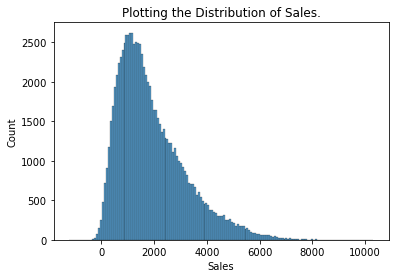

In [8]:
# showing distributions of Sales
plt.title('Plotting the Distribution of Sales.')
sns.histplot(data=fd['Sales'])

<AxesSubplot:title={'center':'Plotting the Distribution of Item Weight.'}, xlabel='Item_W', ylabel='Count'>

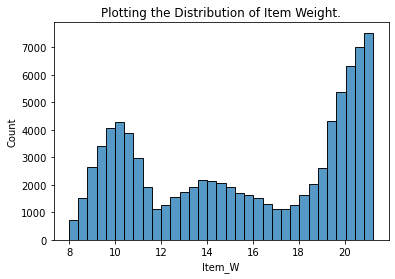

In [9]:
# showing distributions of Sales
plt.title('Plotting the Distribution of Item Weight.')
sns.histplot(data=fd, x='Item_W')

<AxesSubplot:title={'center':'Plotting the Distribution of Item.'}, xlabel='Item_MRP', ylabel='Count'>

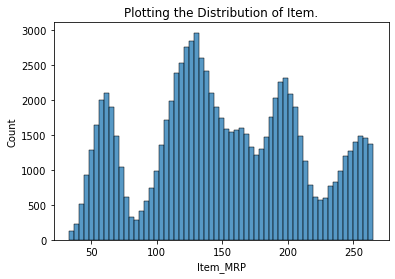

In [10]:
# showing distributions of Sales
plt.title('Plotting the Distribution of Item.')
sns.histplot(data=fd, x='Item_MRP', )

<AxesSubplot:xlabel='Item_Type', ylabel='count'>

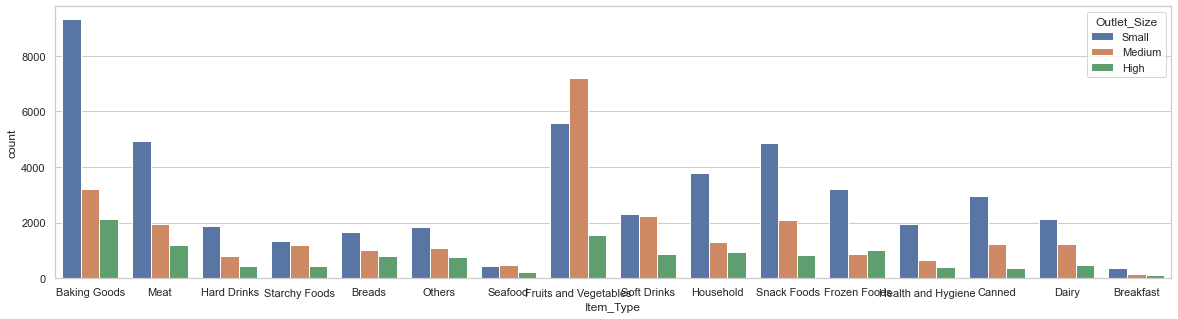

In [11]:
# Show the counts of observations in each categorical bin using bars.
sns.set_theme(style='whitegrid')
plt.figure(figsize=(20, 5))
sns.countplot(data=fd, x='Item_Type', hue='Outlet_Size')

<AxesSubplot:title={'center':'Plotting boxplot of Numeric Sales.'}, xlabel='Sales'>

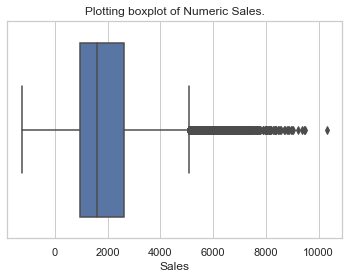

In [12]:
plt.title('Plotting boxplot of Numeric Sales.')
sns.boxplot(data=fd, x='Sales')

<AxesSubplot:title={'center':'Plotting the Relationship between Sales and Year.'}, xlabel='Outlet_Year', ylabel='Sales'>

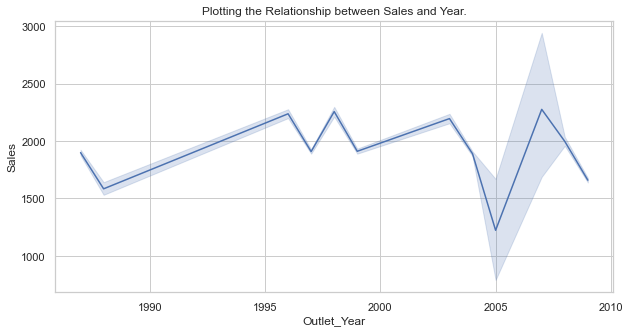

In [13]:
# showing the relationship of sales and year
plt.figure(figsize=(10, 5))
plt.title('Plotting the Relationship between Sales and Year.')
sns.lineplot(data=fd, y='Sales', x='Outlet_Year', dashes=False)

<AxesSubplot:title={'center':'Plotting boxplot Nested Categorical.'}, xlabel='Item_Type', ylabel='Sales'>

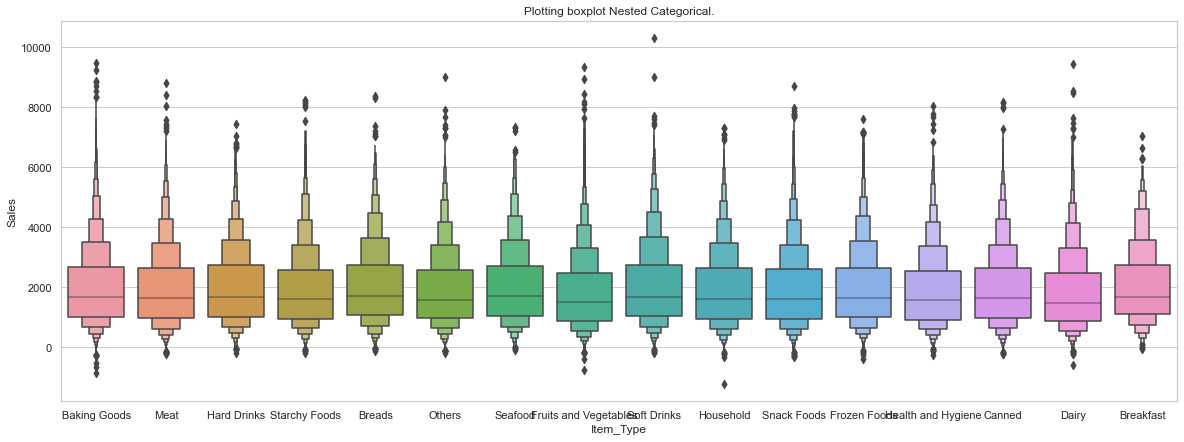

In [14]:
# Detecting outliers
plt.figure(figsize=(20, 7))
plt.title('Plotting boxplot Nested Categorical.')
sns.boxenplot(data=fd, x='Item_Type', y='Sales', orient="v")

**Model Developement**

1. initialazing evn
2. Scaling data
3. split into train and test data
4. implementing algorithsm using pycaret

In [15]:
# dropping cols not to use during modeling
new_fd = fd.drop(['Item_ID','Outlet_ID', 'Outlet_Location_Type'], axis=1)

In [16]:
# initializes the training environment and creates the transformation pipeline.
env_setup = setup(data=new_fd, target="Sales", train_size=0.71, preprocess=True, normalize=True, normalize_method='minmax',
                  session_id=123, transform_target_method='yeo-johnson', transform_target=True,
                  ordinal_features={'Outlet_Size' : ['Small','Medium','High']}, remove_outliers=True,
                  remove_multicollinearity=True)

,Description,Value
0,session_id,123
1,Target,Sales
2,Original Data,"(87864, 6)"
3,Missing Values,False
4,Numeric Features,2
5,Categorical Features,3
6,Ordinal Features,True
7,High Cardinality Features,False
8,High Cardinality Method,None
9,Transformed Train Set,"(59263, 26)"


**Training Model on LightGradientBoostingRegressor**

In [71]:
# trains and evaluates the performance of a given estimator
lgb = create_model('lightgbm', fold=15)
# tunes the hyperparameters of a given estimator
turn_lgb = tune_model(lgb, fold=15)

,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,975.7659,1594366.9589,1262.6824,0.0122,0.8555,2.9110
1,979.3272,1629311.7182,1276.4450,0.0150,0.8666,4.2244
2,993.4686,1634240.4651,1278.3741,0.0139,0.8417,1.8750
3,982.0679,1632953.3252,1277.8706,0.0227,0.8410,1.5981
4,984.1722,1652429.2953,1285.4685,0.0129,0.8335,2.2003
5,993.6192,1684325.1493,1297.8155,0.0055,0.8100,2.0713
6,984.2499,1627420.8738,1275.7041,0.0189,0.8327,1.7040
7,990.8879,1640674.6088,1280.8882,0.0169,0.8425,21.2068
8,1001.1529,1686114.9195,1298.5049,0.0150,0.8331,1.4307
9,980.9198,1603178.8842,1266.1670,0.0081,0.8324,1.9259


**Training Model on CatBoostingRegressor**

In [18]:
# trains and evaluates the performance of a given estimator
cat = create_model('catboost')
# tunes the hyperparameters of a given estimator
turn_cat = tune_model(cat)

,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,974.9829,1602335.2707,1265.8338,0.0123,0.8419,2.5579
1,989.6631,1634858.6405,1278.6159,0.0161,0.8671,3.4510
2,978.3430,1619695.5208,1272.6726,0.0218,0.8402,1.5782
3,992.7632,1691954.2291,1300.7514,0.0065,0.8149,2.3601
4,987.7686,1641854.4838,1281.3487,0.0201,0.8358,1.6265
5,995.6268,1658438.6985,1287.8038,0.0154,0.8357,14.9527
6,979.3687,1608242.1716,1268.1649,0.0026,0.8243,1.6956
7,992.7855,1662404.5106,1289.3427,0.0147,0.8299,1.5038
8,985.5562,1638611.4704,1280.0826,0.0097,0.8308,1.8366
9,974.0081,1626338.5640,1275.2798,0.0157,0.8133,1.2840


**Training Model on Extreme Gradient Regressor**

In [19]:
# trains and evaluates the performance of a given estimator
xgb = create_model('xgboost')
# tunes the hyperparameters of a given estimator
turn_xgb = tune_model(xgb)

,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,974.0778,1600101.6250,1264.9513,0.0137,0.8424,2.5731
1,990.3071,1636574.0000,1279.2865,0.0150,0.8677,3.4293
2,978.9388,1619761.3750,1272.6985,0.0217,0.8411,1.5854
3,991.4670,1689938.1250,1299.9762,0.0077,0.8149,2.3580
4,988.7065,1642790.1250,1281.7137,0.0195,0.8366,1.6428
5,995.3204,1657688.3750,1287.5125,0.0159,0.8360,15.0184
6,979.4182,1606512.8750,1267.4829,0.0037,0.8246,1.7078
7,992.6473,1663640.2500,1289.8218,0.0139,0.8303,1.5061
8,983.8601,1635004.7500,1278.6731,0.0119,0.8306,1.8429
9,973.9759,1626329.0000,1275.2760,0.0157,0.8137,1.2836


In [21]:
# trains a Voting Regressor for select models passed
blend_mdl = blend_models([lgb, cat, xgb])

,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,980.9042,1617551.4409,1271.8300,0.0030,0.8436,2.5456
1,993.9778,1646122.8157,1283.0132,0.0093,0.8687,3.4771
2,982.8023,1631081.3735,1277.1380,0.0149,0.8419,1.5868
3,995.3193,1702237.8042,1304.6984,0.0004,0.8162,2.3978
4,990.6718,1652371.5136,1285.4460,0.0138,0.8374,1.6284
5,1000.4485,1674217.5744,1293.9156,0.0060,0.8383,15.0692
6,982.1666,1620389.2115,1272.9451,-0.0049,0.8257,1.7046
7,995.8370,1671008.5789,1292.6750,0.0096,0.8311,1.5028
8,990.5495,1654502.9722,1286.2748,0.0001,0.8336,1.8403
9,978.2744,1639079.8992,1280.2656,0.0080,0.8150,1.2800


In [22]:
# returns the best model out of all trained models
best_mdl = automl()
print(best_mdl)

PowerTransformedTargetRegressor(bagging_fraction=0.6, bagging_freq=4,
                                boosting_type='gbdt', class_weight=None,
                                colsample_bytree=1.0, feature_fraction=0.9,
                                importance_type='split', learning_rate=0.05,
                                max_depth=-1, min_child_samples=96,
                                min_child_weight=0.001, min_split_gain=0.7,
                                n_estimators=180, n_jobs=-1, num_leaves=10,
                                objective=None,
                                power_transformer_method='...
                                                        importance_type='split',
                                                        learning_rate=0.05,
                                                        max_depth=-1,
                                                        min_child_samples=96,
                                                        min_child_wei

**Model Interpretation and Analysis**

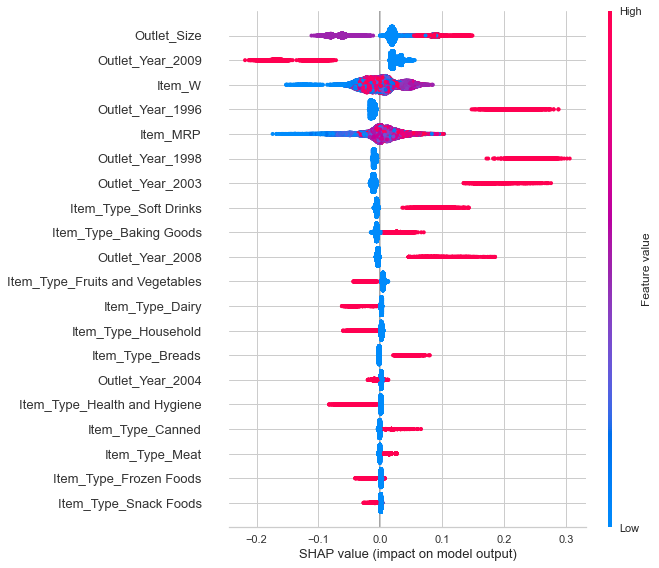

In [72]:
# analyzes the predictions generated from a trained model
interpret_model(turn_lgb)

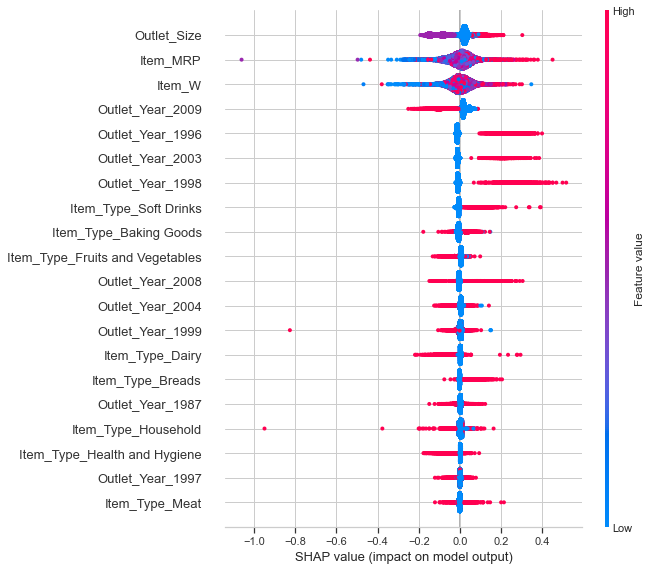

In [24]:
# analyzes the predictions generated from a trained model
interpret_model(cat)

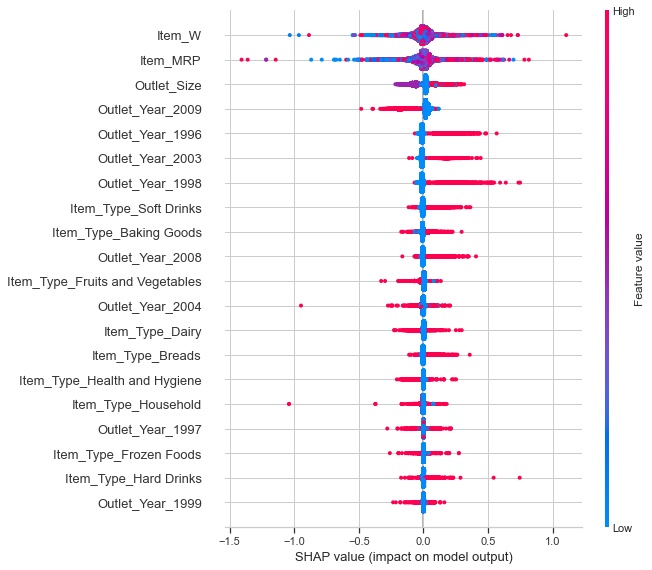

In [25]:
# analyzes the predictions generated from a trained model
interpret_model(xgb)

In [73]:
# an interface for analyzing performance of a trained model
evaluate_model(turn_lgb)

interactive(children=(ToggleButtons(description='Plot Type:', icons=('',), options=(('Hyperparameters', 'param…

In [60]:
# an interface for analyzing performance of a trained model
evaluate_model(turn_cat)

interactive(children=(ToggleButtons(description='Plot Type:', icons=('',), options=(('Hyperparameters', 'param…

In [59]:
# an interface for analyzing performance of a trained model
evaluate_model(turn_xgb)

interactive(children=(ToggleButtons(description='Plot Type:', icons=('',), options=(('Hyperparameters', 'param…

**Finalizing Model for Deployment**

In [62]:
# finalizing model ready for deployment
final_xgb = finalize_model(turn_lgb)

**Loading Testing Dataset**

In [63]:
# loading training datasets
unseen = pd.read_csv('test.csv')

In [64]:
# returns the first 5 row
unseen.head()

,Item_ID,Item_W,Item_Type,Item_MRP,Outlet_ID,Outlet_Year,Outlet_Size,Outlet_Location_Type
0,DRM23,10.156725,Snack Foods,119.319482,OUT013,1999,High,Tier 3
1,FDG47,10.434425,Household,263.600449,OUT018,1987,High,Tier 3
2,FDN21,11.953589,Health and Hygiene,246.286990,OUT018,1997,High,Tier 1
3,FDZ23,14.948546,Dairy,136.200508,OUT046,2004,Medium,Tier 2
4,FDC16,11.080042,Canned,173.145664,OUT018,2009,Medium,Tier 3


In [65]:
# Return a tuple representing the dimensionality of the DataFrame.unseen.shape
unseen.shape

(37656, 8)

In [66]:
# dropping cols not to use during modeling
new_un = unseen.drop(['Item_ID','Outlet_ID', 'Outlet_Location_Type'], axis=1)

**Predicting Unseen Datasets on Trained Model**

In [67]:
# predicts Label using a trained model
pred = predict_model(final_xgb, data=new_un)
# returns the first 15 rows
pred.head(10)

,Item_W,Item_Type,Item_MRP,Outlet_Year,Outlet_Size,Label
0,10.156725,Snack Foods,119.319482,1999,High,1901.117933
1,10.434425,Household,263.600449,1987,High,2017.878928
2,11.953589,Health and Hygiene,246.286990,1997,High,1812.493030
3,14.948546,Dairy,136.200508,2004,Medium,1543.915112
4,11.080042,Canned,173.145664,2009,Medium,1471.722939
5,17.926047,Snack Foods,170.715640,1999,High,1899.265079
6,17.015887,Canned,129.429127,1987,Medium,1733.281183
7,17.667898,Frozen Foods,117.019439,1996,Medium,2111.687430
8,13.427877,Dairy,237.580902,1997,Medium,1653.723062
9,12.461133,Health and Hygiene,138.913990,2009,High,1765.385214


In [68]:
# extracting predicted col
submit = pred[['Label']]
# renaming columns using mapping
submit = submit.rename(columns={'Label':'Sales'})
submit.head()

,Sales
0,1901.117933
1,2017.878928
2,1812.493030
3,1543.915112
4,1471.722939


In [69]:
# Write object to a comma-separated values
submit.to_csv('Submit_file.csv', index=False)

In [70]:
# saves the transformation pipeline and trained model object into the current working directory as a pickle file
save_model(final_xgb, 'DAC_Model')

Transformation Pipeline and Model Successfully Saved


(Pipeline(memory=None,
          steps=[('dtypes',
                  DataTypes_Auto_infer(categorical_features=[],
                                       display_types=True, features_todrop=[],
                                       id_columns=[], ml_usecase='regression',
                                       numerical_features=[], target='Sales',
                                       time_features=[])),
                 ('imputer',
                  Simple_Imputer(categorical_strategy='not_available',
                                 fill_value_categorical=None,
                                 fill_value_numerical=None,
                                 numeric_strategy='...
                                                                          learning_rate=0.05,
                                                                          max_depth=-1,
                                                                          min_child_samples=96,
                                   